# **1. Student:**
### nadav_daniel

link to propile in kaggle
https://www.kaggle.com/nadavdaniel

# **2. Competition Overview**
This notebook demonstrates a simple linear regression model to predict house prices using a dataset from Kaggle. The goal is to learn key data science steps, from data preprocessing to model evaluation.


## Imports and Definitions

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn import pipeline, preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection

import pandas as pd
import seaborn as sns # we will use it for showing the regression line

# define plt settings
plt.rcParams["font.size"] = 5
plt.rcParams["axes.labelsize"] = 5
plt.rcParams["xtick.labelsize"] = 5
plt.rcParams["ytick.labelsize"] = 5
plt.rcParams["legend.fontsize"] = 5
plt.rcParams["figure.figsize"] = (5,3)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading the data with pandas dataframe
The dataset contains information about house characteristics and sale prices. Key features include square footage, number of rooms, location indicators, and others.


In [ ]:
file_path = '/content/drive/MyDrive/train.csv'
df = pd.read_csv(file_path)
df.reset_index(drop=True, inplace=True) # making the indexes to be from 0 to N, where drop resets the index to the default integer index, and inplace modify the df rather than creating a new one.
display(df)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

We downloaded the train data from Kaggle, uploaded it to Google Drive, and loaded it into Nootebook.

# **3. Data Investigation**
* Use plots to show correlations

* Handle missing values or outliers

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We learned to deal only with numeric values during this stage of the course, so we will not deal with columns containing objects (text). Thus, we remove columns with dtype objects.


In [ ]:
train_df = df.copy() #Copying df to save the initial data
train_df = train_df.select_dtypes(exclude=['object']) # Removes entire columns that contain Object dtype.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

As we see above, the data has missing values (NaN) in 3 features.

To train the machine, we need to remove these. We'll check the cells with NaN to decide if we should remove the column or rows,while trying to lose as little data as possible.

* `MasVnrArea` contains only 8 rows out of 1460 with Nan Value, so it is not justified to remove the entire column. Therefore, we will remove 6 rows.

* `GarageYrBlt` has 81 rows with NaN, which is 5.55% (Low percentage) of the total.
We will remove the rows with NaN because there is no justification for removing the entire column.

* `LotFrontage` has 259 missing values, which is 17.74% of all rows. After removing some columns and then rows, we'll check how 'LotFrontage' relates to 'SalePrice'. By comparing these, we can see which way of removing data keeps a better relationship.

In [ ]:

# Rows with a NaN value in the MasVnrArea column is removed
train_df = train_df[train_df['MasVnrArea'].notna()]

# Rows with a NaN value in the GarageYrBlt column is removed
train_df = train_df[train_df['GarageYrBlt'].notna()]

train_df.reset_index(drop=True, inplace=True)

# To make a comparison regarding the LotFrontage feature, we copy the data
remove_cols = train_df.copy()
remove_rows = train_df.copy()

# Create two versions:
# A. Version that deletes the LotFrontage column
remove_cols = remove_cols.drop('LotFrontage', axis=1)

# B. Version that deletes only the rows with NaN in the LotFrontage column
remove_rows = remove_rows[remove_rows['LotFrontage'].notna()]

Path A – Training a model without LotFrontage column

In [ ]:

# define X and y - without LotFrontage
X_removed = remove_cols.drop(columns=['SalePrice'])
y_removed = remove_cols['SalePrice']

# Training the model
NE_model_removed_col = linear_model.LinearRegression()
NE_reg_removed_col = NE_model_removed_col.fit(X_removed, y_removed)
y_pred_removed = NE_model_removed_col.predict(X_removed)

# Performance metrics
r2_removed_col = NE_reg_removed_col.score(X_removed, y_removed)
mae_removed_col = metrics.mean_absolute_error(y_removed, y_pred_removed)
rmse_removed_col = metrics.root_mean_squared_error(y_removed, y_pred_removed)

print("Path A (without LotFrontage):")
print(f"R²: {r2_removed_col:.4f}")
print(f"MAE: {mae_removed_col:.2f}")
print(f"RMSE: {rmse_removed_col:.2f}")
print(f"Remaining Rows: {len(remove_cols)}")

Path A (without LotFrontage):
R²: 0.8099
MAE: 21029.13
RMSE: 34377.06
Remaining Rows: 1371


Path B: In the LotFrontage column, we remove rows with NaN values

In [ ]:
# Check correlation
correlation = remove_rows['LotFrontage'].corr(remove_rows['SalePrice'])
print(f"Correlation between LotFrontage and SalePrice: {correlation:.4f}")

Correlation between LotFrontage and SalePrice: 0.3443


In [ ]:
# define X and y - with LotFrontage
X_removed2 = remove_rows.drop(columns=['SalePrice'])
y_removed2 = remove_rows['SalePrice']

# Training the model
NE_model_removed_row = linear_model.LinearRegression()
NE_reg_removed_row = NE_model_removed_row.fit(X_removed2, y_removed2)
y_pred_removed = NE_model_removed_row.predict(X_removed2)

# Performance metrics
r2_removed_row = NE_reg_removed_row.score(X_removed2, y_removed2)
mae_removed_row = metrics.mean_absolute_error(y_removed2, y_pred_removed)
rmse_removed_row = metrics.root_mean_squared_error(y_removed2, y_pred_removed)

print("Path B (with LotFrontage):")
print(f"R²: {r2_removed_row:.4f}")
print(f"MAE: {mae_removed_row:.2f}")
print(f"RMSE: {rmse_removed_row:.2f}")
print(f"Remaining Rows: {len(remove_rows)}")

Path B (with LotFrontage):
R²: 0.8096
MAE: 22152.49
RMSE: 36204.60
Remaining Rows: 1121


To see if removing rows or the whole column for missing data is better, we checked the data and made a simple model for each way.

This helped us understand which method keeps the most important info for the model.

In [ ]:
# Creating a comparison table
comparison_df = pd.DataFrame({
    "Strategy": ["Remove Column (LotFrontage)", "Remove Rows (with LotFrontage)"],
    "R²": [r2_removed_col, r2_removed_row],
    "MAE": [mae_removed_col, mae_removed_row],
    "RMSE": [rmse_removed_col, rmse_removed_row],
    "Remaining Rows": [len(remove_cols), len(remove_rows)]
})

# Printing the table
print(comparison_df.to_string(index=False))

                      Strategy       R²          MAE         RMSE  Remaining Rows
   Remove Column (LotFrontage) 0.809890 21029.131956 34377.060927            1371
Remove Rows (with LotFrontage) 0.809556 22152.488278 36204.601331            1121


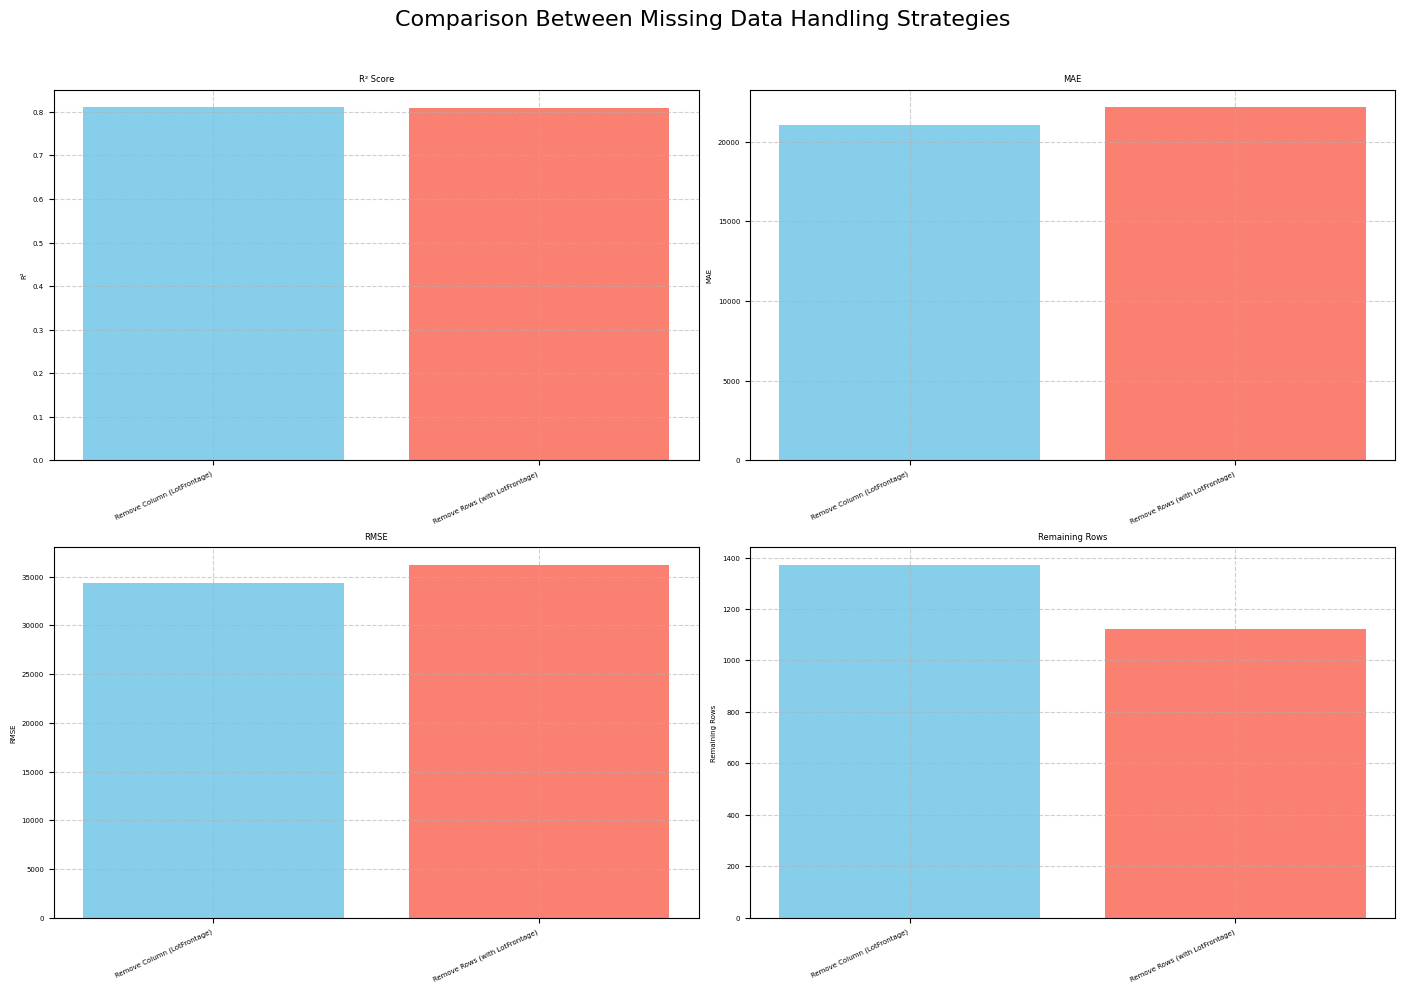

In [ ]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    "Strategy": ["Remove Column (LotFrontage)", "Remove Rows (with LotFrontage)"],
    "R²": [r2_removed_col, r2_removed_row],
    "MAE": [mae_removed_col, mae_removed_row],
    "RMSE": [rmse_removed_col, rmse_removed_row],
    "Remaining Rows": [len(remove_cols), len(remove_rows)]
})

# Plot configuration
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
Measures = ["R²", "MAE", "RMSE", "Remaining Rows"]
colors = ["skyblue", "salmon"]
x_labels = comparison_df["Strategy"]
x_positions = range(len(x_labels))

# Plot each metric
for i, Measure in enumerate(Measures):
    ax = axes[i]
    ax.bar(x_positions, comparison_df[Measure], color=colors)
    ax.set_title(Measure if Measure != "R²" else "R² Score")
    ax.set_ylabel(Measure)
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(x_labels, rotation=25, ha='right')

# Overall title
plt.suptitle("Comparison Between Missing Data Handling Strategies", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
train_df = train_df.drop('LotFrontage',axis=1) # We decide removing LotFrontage column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1371 non-null   int64  
 1   MSSubClass     1371 non-null   int64  
 2   LotArea        1371 non-null   int64  
 3   OverallQual    1371 non-null   int64  
 4   OverallCond    1371 non-null   int64  
 5   YearBuilt      1371 non-null   int64  
 6   YearRemodAdd   1371 non-null   int64  
 7   MasVnrArea     1371 non-null   float64
 8   BsmtFinSF1     1371 non-null   int64  
 9   BsmtFinSF2     1371 non-null   int64  
 10  BsmtUnfSF      1371 non-null   int64  
 11  TotalBsmtSF    1371 non-null   int64  
 12  1stFlrSF       1371 non-null   int64  
 13  2ndFlrSF       1371 non-null   int64  
 14  LowQualFinSF   1371 non-null   int64  
 15  GrLivArea      1371 non-null   int64  
 16  BsmtFullBath   1371 non-null   int64  
 17  BsmtHalfBath   1371 non-null   int64  
 18  FullBath

Conclusion: Removing the LotFrontage Column

Missing data in the 'LotFrontage' column was handled in two ways: removing the whole column or removing rows with missing values.

We saw that:

* Removing the column kept more data.

* Model results (like R2, MAE, and RMSE) were a little better when the column was removed.

* 'LotFrontage' and 'SalePrice' didn't have a strong connection.

So, it seems better to remove the 'LotFrontage' column. This keeps more data and the model works just as well or even a bit better.

In [ ]:
# Get a list of all column names
feature_columns = train_df.columns.tolist()

# Divide into two groups of 19 and 18 in size
first_group_cols = feature_columns[:19]
second_group_cols = feature_columns[19:37]

# Create separate DataFrames
first_group = train_df[first_group_cols].copy()
second_group = train_df[second_group_cols].copy()

# Check first group
first_group.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1371.000000  1371.000000    1371.000000  1371.000000  1371.000000   
mean    731.169949    56.072210   10686.740336     6.180890     5.582057   
std     421.406120    41.063631   10224.805648     1.344125     1.081199   
min       1.000000    20.000000    1300.000000     2.000000     2.000000   
25%     365.500000    20.000000    7734.000000     5.000000     5.000000   
50%     733.000000    50.000000    9591.000000     6.000000     5.000000   
75%    1094.500000    70.000000   11708.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1371.000000   1371.000000  1371.000000  1371.000000  1371.000000   
mean   1972.808169   1985.342815   108.997082   453.880379    48.382932   
std      29.374036     20.453845   184.545459   458.982153   164.762510   
min    1880.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1955.000000   1967.500000     0.000000     0.000000     0.000000   
50%    1975.000000   1994.000000     0.000000   399.000000     0.000000   
75%    2001.000000   2004.000000   171.500000   728.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1371.000000  1371.000000  1371.000000  1371.000000   1371.000000   
mean    570.606127  1072.869438  1175.778264   353.411379      4.159008   
std     443.917548   435.797686   385.409660   439.405368     40.246298   
min       0.000000     0.000000   438.000000     0.000000      0.000000   
25%     226.000000   808.000000   894.000000     0.000000      0.000000   
50%     476.000000  1008.000000  1098.000000     0.000000      0.000000   
75%     811.000000  1314.000000  1414.000000   736.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  
count  1371.000000   1371.000000   1371.000000  1371.000000  
mean   1533.348651      0.428884      0.059081     1.577681  
std     519.313228      0.513906      0.238937     0.547374  
min     438.000000      0.000000      0.000000     0.000000  
25%    1152.000000      0.000000      0.000000     1.000000  
50%    1479.000000      0.000000      0.000000     2.000000  
75%    1788.000000      1.000000      0.000000     2.000000  
max    5642.000000      2.000000      2.000000     3.000000

In [ ]:
# Check second group
second_group.describe()

HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1371.000000   1371.000000   1371.000000   1371.000000  1371.000000   
mean      0.394602      2.865791      1.037929      6.552152     0.641138   
std       0.502200      0.782708      0.194875      1.590350     0.644709   
min       0.000000      0.000000      1.000000      3.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      6.000000      3.000000     12.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000   
mean   1978.374179     1.869438   500.389497    97.657914    46.994165   
std      24.688912     0.631086   185.939979   126.759726    64.983737   
min    1900.000000     1.000000   160.000000     0.000000     0.000000   
25%    1961.000000     1.000000   378.000000     0.000000     0.000000   
50%    1980.000000     2.000000   484.000000     0.000000    27.000000   
75%    2002.000000     2.000000   582.500000   171.000000    69.000000   
max    2010.000000     4.000000  1418.000000   857.000000   547.000000   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1371.000000  1371.000000  1371.000000  1371.000000   1371.000000   
mean       21.016047     3.630926    16.038658     2.938001     43.139314   
std        60.500067    30.241332    57.403495    41.455453    503.065627   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

            MoSold       YrSold      SalePrice  
count  1371.000000  1371.000000    1371.000000  
mean      6.330416  2007.811816  185181.890591  
std       2.692423     1.331112   78872.352654  
min       1.000000  2006.000000   35311.000000  
25%       5.000000  2007.000000  133950.000000  
50%       6.000000  2008.000000  167000.000000  
75%       8.000000  2009.000000  217750.000000  
max      12.000000  2010.000000  755000.000000

In [ ]:
# Assume the distribution is suspicious if there are many zeros or a high standard deviation relative to the mean
suspicious_features = []

# Threshold percentage at which we suspect there are many zeros
zero_threshold = 0.75


for col in train_df.select_dtypes(include=['number']).columns:
    desc = train_df[col].describe()
    zero_ratio = (train_df[col] == 0).mean()

    # If over 75% are zeros, or the maximum is very large than the mean
    if zero_ratio > zero_threshold or desc['max'] > 10 * desc['mean']:
        suspicious_features.append(col)

print("Suspicious features:", suspicious_features)

Suspicious features: ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In the table above, we see the distribution of the features.
During data analysis, we identified features that may require closer investigation due to statistical anomalies.

Criteria for flagging features as suspicious:

- Features with over 75% zero values (indicating sparse or mostly irrelevant data).

- Features with a very high maximum relative to their mean (indicating strong skewness or potential outliers).

These characteristics may reduce model performance, introduce noise, or require transformation

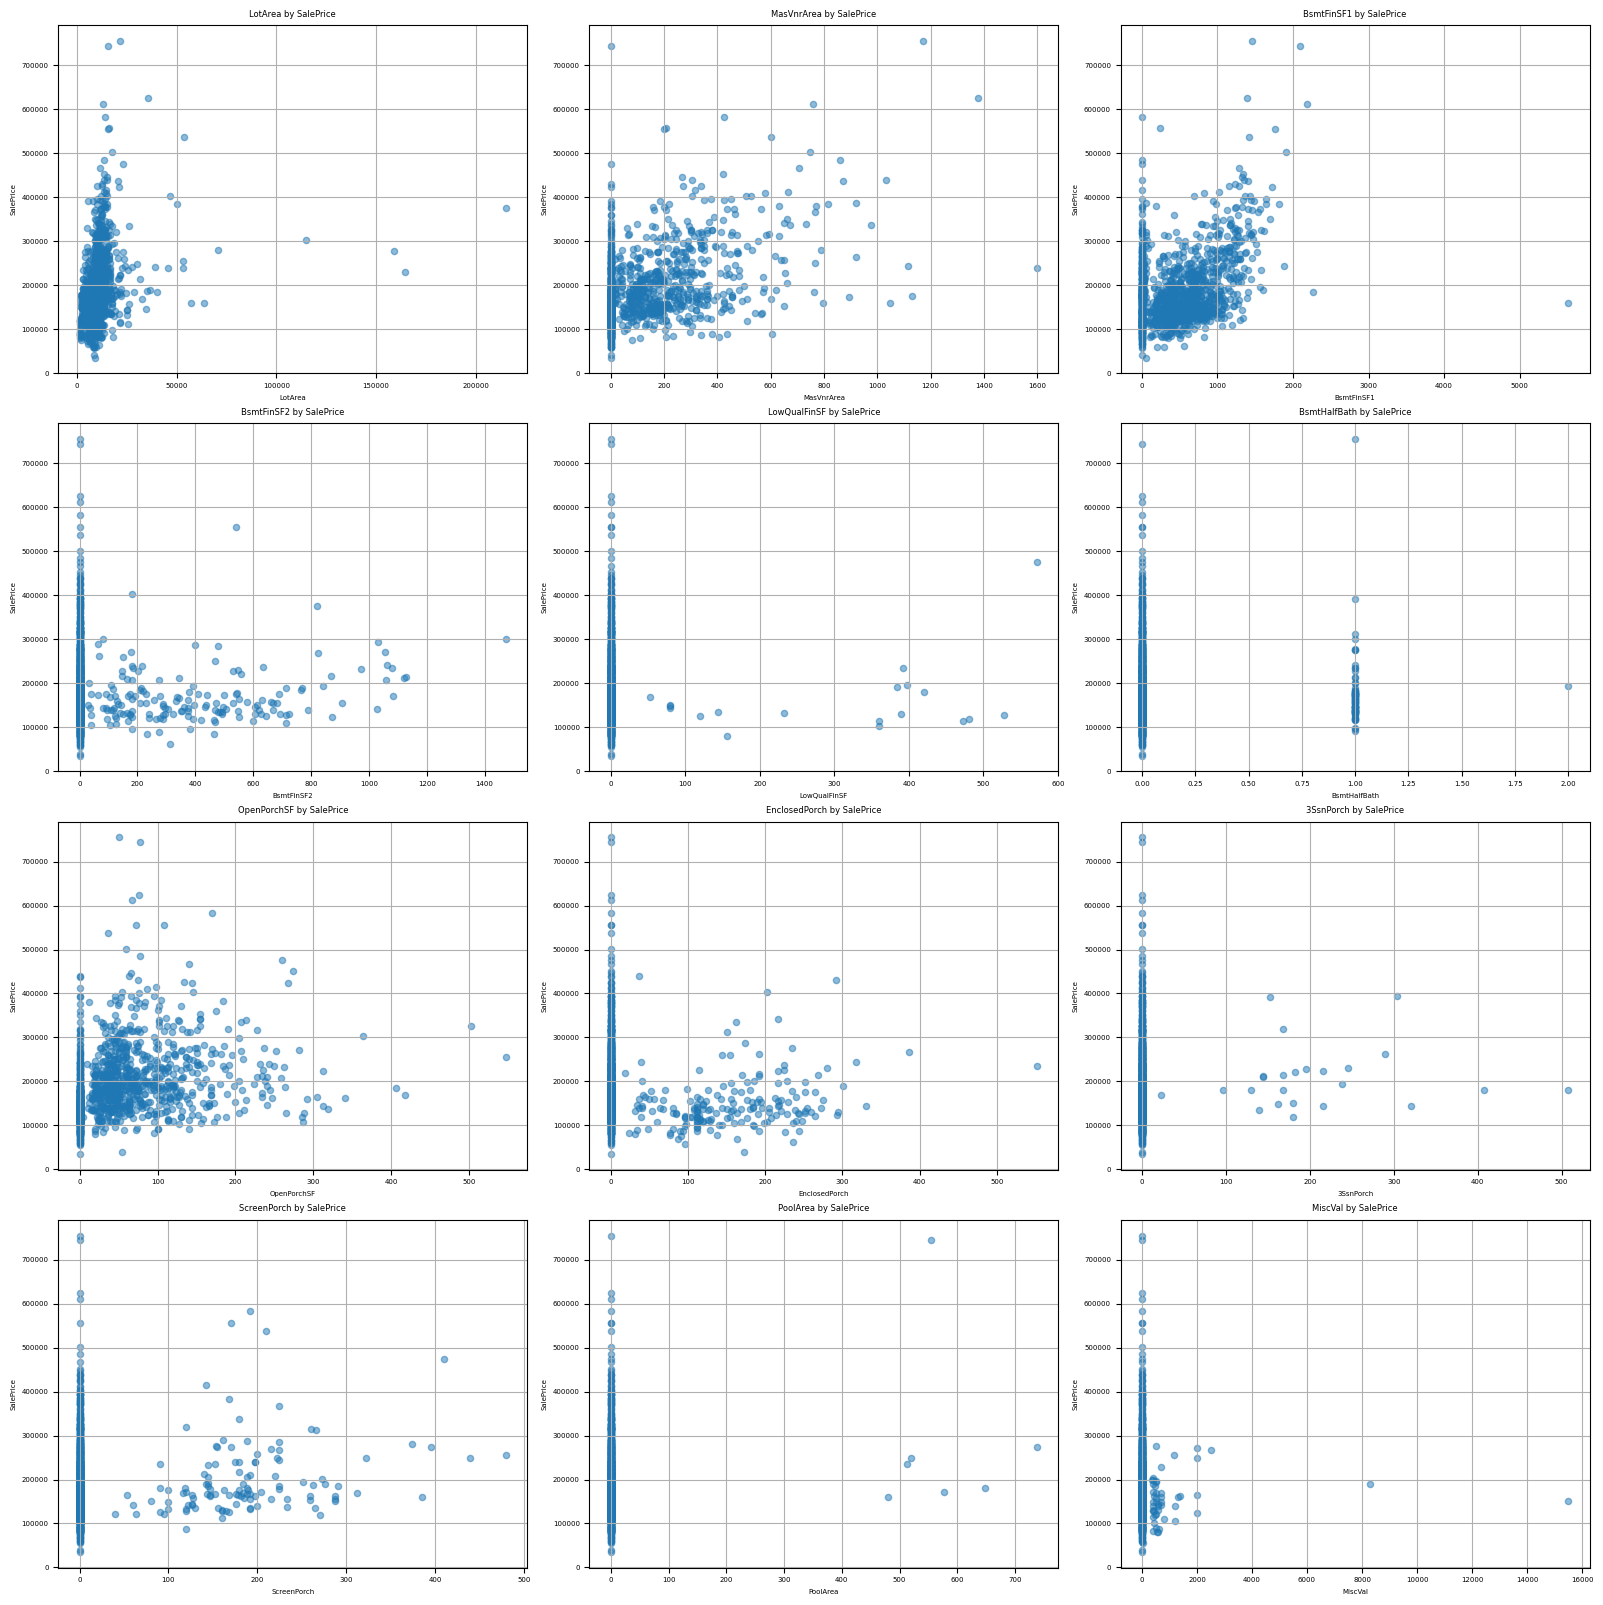

In [ ]:
# Function to display a relationship between two features
def plot_connection_between_2_features(df, feature_1_name, feature_2_name, ax=None):
    df.plot.scatter(
        x=feature_1_name,
        y=feature_2_name,
        ax=ax,
        alpha=0.5,
        title=f'{feature_1_name} by {feature_2_name}'
    )
    if ax:
        ax.set_xlabel(feature_1_name)
        ax.set_ylabel(feature_2_name)
        ax.grid(True)

# Number of graphs per row
n_cols = 3
n_rows = -(-len(suspicious_features) // n_cols)  # עיגול כלפי מעלה


fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Running plot_connection_between_2_features function on each feature
for i, feature in enumerate(suspicious_features):
    if feature in train_df.columns:
        plot_connection_between_2_features(train_df, feature, 'SalePrice', ax=axes[i])
    else:
        axes[i].set_visible(False)

# Hide empty cells if any
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

 We can see above the Scatter Plot Analysis – Suspicious Features vs. `SalePrice`

- `LowQualFinSF`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`
These features are extremely sparse and show no visual correlation with the target variable, which strengthens the suspicion that they are intended to be removed.

- `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `OpenPorchSF`
These features are right-biased with extreme values. While there is some potential relationship with `SalePrice`.

- `BsmtHalfBath`, `BsmtFinSF2`, `EnclosedPorch`
Their graphs reveal that their contribution is small to the model, which has minimal variance, weak dispersion, and an almost binary distribution. Therefore, the suspicion of their removal is growing.

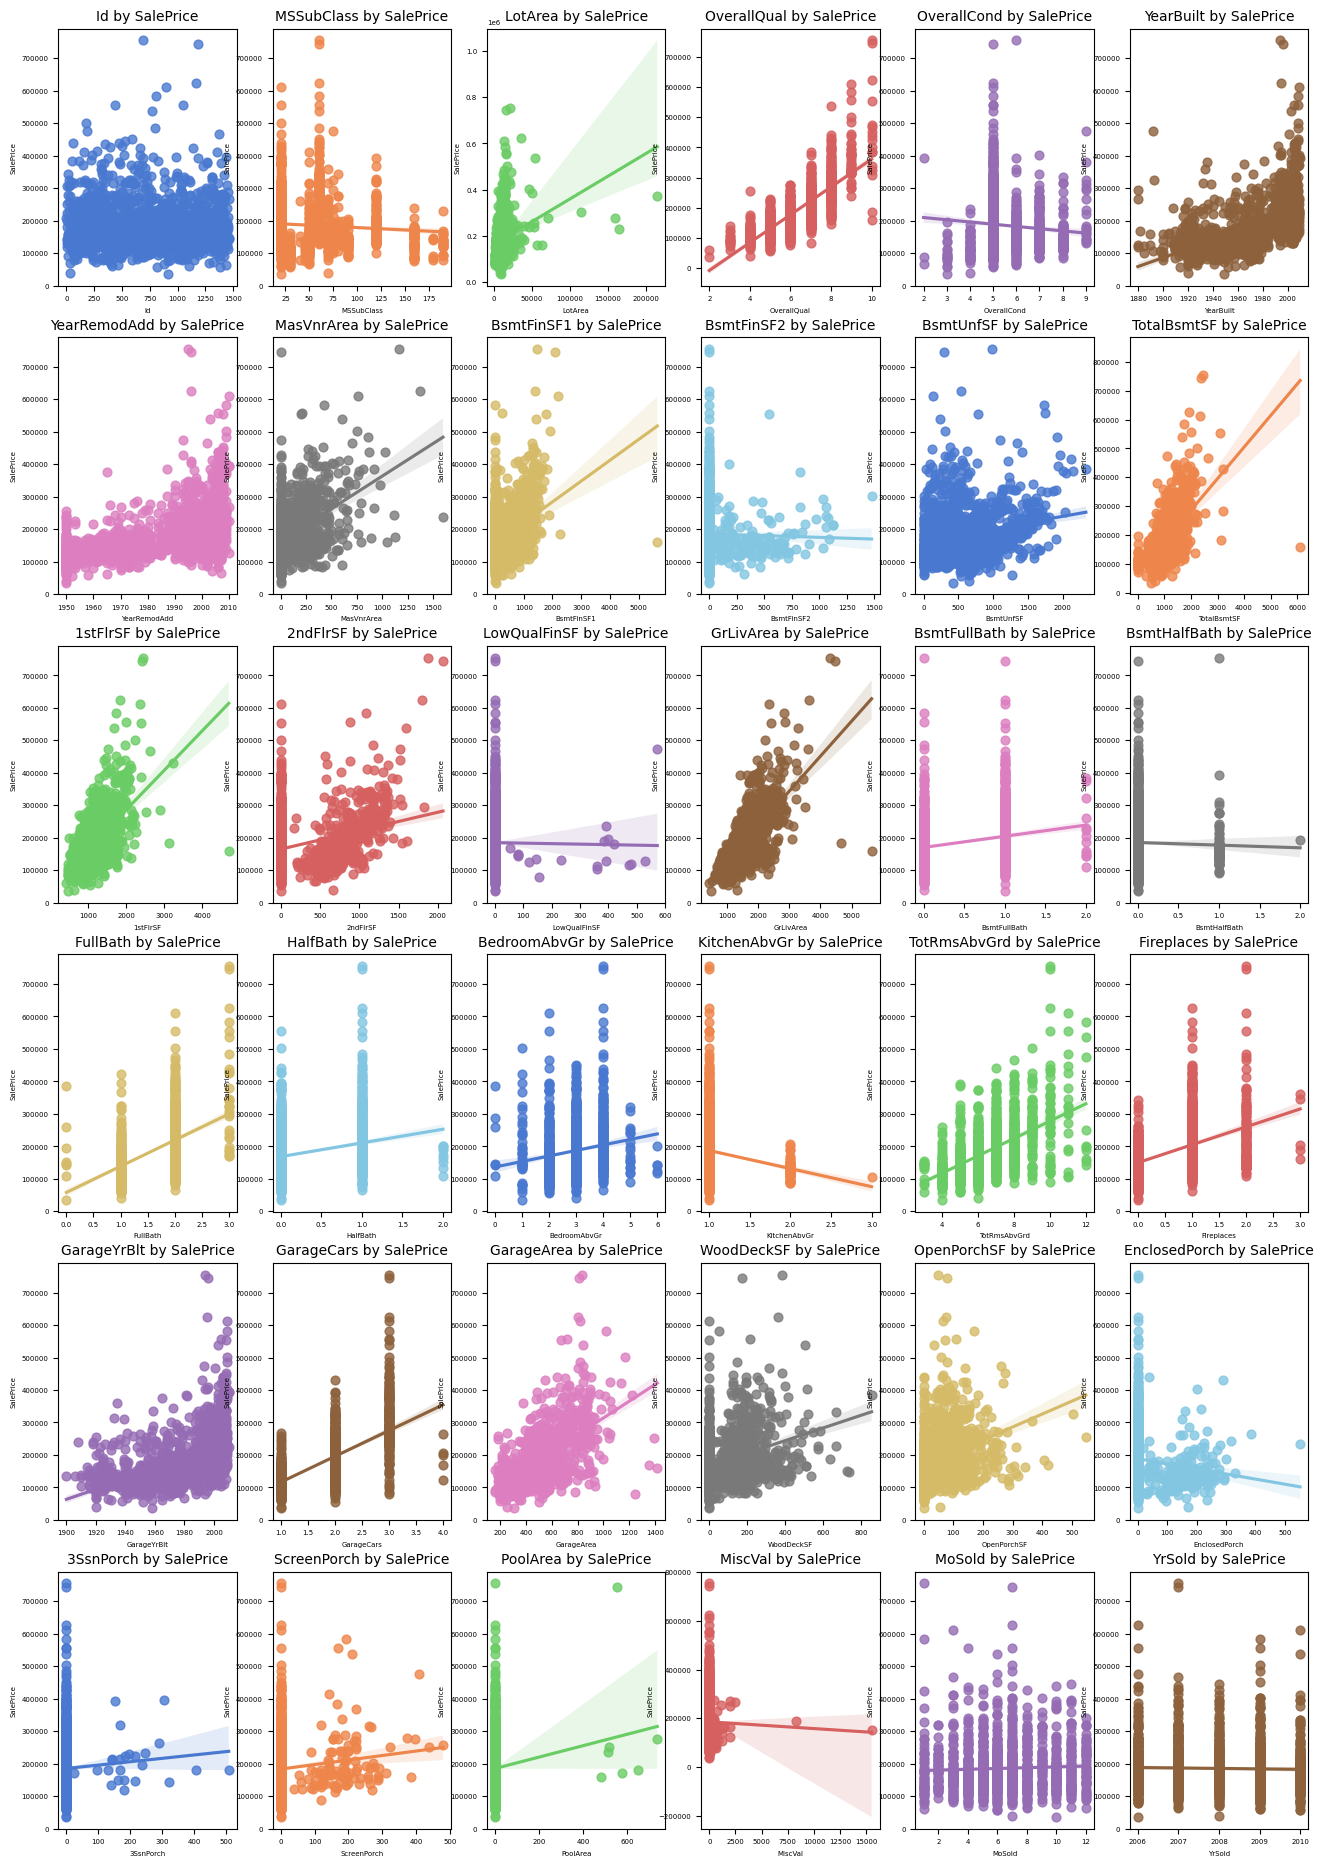

In [ ]:
# get color map
def get_sns_cmap(n, name='muted'):
    return sns.color_palette(palette=name, n_colors=n)

# plot with regression line target values by each feature
def plot_reg_target_values_by_each_feature(df, target_column_name):
    nrows = math.ceil(math.sqrt(len(df.columns)-1))
    ncols = math.ceil((len(df.columns)-1)/nrows)
    fig, axes = plt.subplots(nrows, ncols)
    plt.subplots_adjust(top=6, bottom=0, left=0, right=2.5)
    colors = get_sns_cmap(len(df.columns))

    counter = 0
    for i in range(len(df.columns)-1):
        ax = sns.regplot(x=df.columns[i], y=target_column_name, data=df, color=colors[i], ax=axes[i//nrows, i%nrows], scatter_kws={"s": 40})
        ax.set_title(label=f'{df.columns[i]} by {target_column_name}', fontsize=10)

    for i in range(len(df.columns)-1, nrows*ncols):
        fig.delaxes(axes.flatten()[i])

plot_reg_target_values_by_each_feature(train_df, 'SalePrice')

Looking at the graphs, some features clearly go up with 'SalePrice' (linear trend). This means they probably help the model. For example, `OverallQual` – shows a very strong positive trend – contributes significantly to the model.

But some features seem "problematic":

- `KitchenAbvGr` – Looks almost like binary distribution, which isn't good for a linear model - we might remove it.

- `MoSold`, `YrSold` – Don't change much (low and constant variance), so they don't tell the model much about 'SalePrice' - we might remove them.

- `Id` – a unique number, doesn't relate to 'SalePrice' - we can safely remove it.

- `LotArea`, `BsmtFinSF1`, `MasVnrArea` – Spread out and go up with 'SalePrice' (wide and positive trend), are useful, but we need to check their correlation with SalePrice to decide whether to keep them

- `LowQualFinSF`, `MiscVal`, `ScreenPorch` – Mostly just one value, not linear, might not be good - suspect for removal.

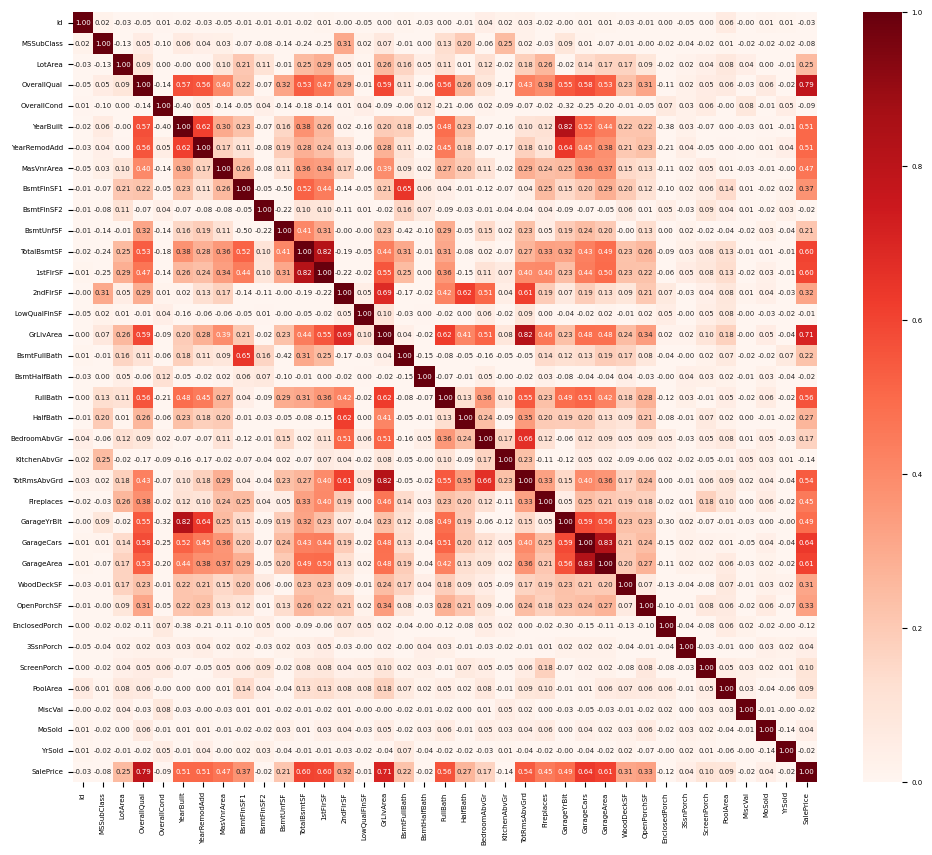

In [ ]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1,fmt=".2f")
#sns.heatmap(cor, annot=True, cmap='coolwarm', )
plt.show()

In [ ]:
drop_cols = ['Id','LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
             'KitchenAbvGr','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','MoSold', 'YrSold']

train_df = train_df.drop(columns=drop_cols)

Above is the person correlation table, which shows correlations between features, particularly the target column SalePrice.

According to the central limit theorem, since there are over 30 observations, this means that the data is approximately normally distributed.
Therefore, it can be used in the person correlation table.

It can be seen that there is a very weak correlation between the variables of the columns -
`Id`, `LotArea`, `BsmtFinSF2`, `LowQualFinSF`, `BsmtHalfBath`,
             `KitchenAbvGr`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, `MoSold`, `YrSold`
and the other features/variables in the other columns

After examining all the checks above and our observations so far, we have decided to remove these columns from the model training.

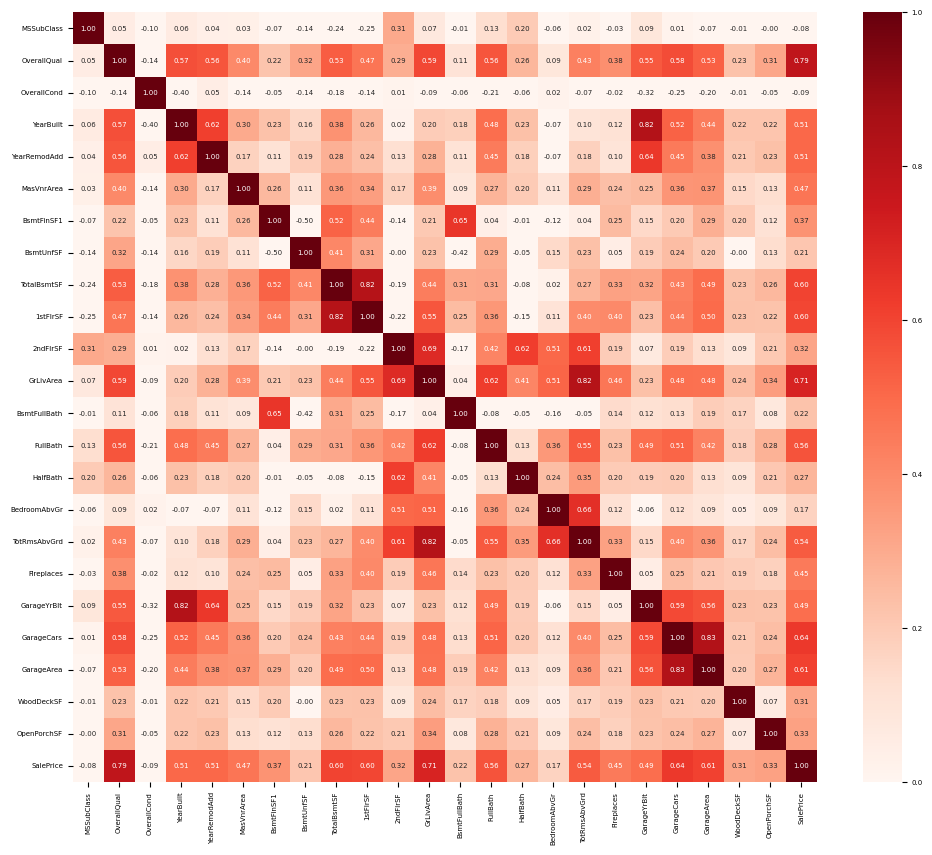

In [ ]:
plt.figure(figsize=(12,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1,fmt=".2f")
#sns.heatmap(cor, annot=True, cmap='coolwarm', )
plt.show()

In [ ]:
def calculate_mean_error(y_true, y_pred):
  """Calculates Mean Error (Bias)."""
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  errors = y_pred - y_true
  mean_error = np.mean(errors)
  return mean_error

## Train-Test Split


In [ ]:
target= train_df['SalePrice']
X = train_df.drop('SalePrice',axis=1)
print('X')
display(X)
print()
print('target')
display(target)

X


MSSubClass  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60            7            5       2003          2003   
1             20            6            8       1976          1976   
2             60            7            5       2001          2002   
3             70            7            5       1915          1970   
4             60            8            5       2000          2000   
5             50            5            5       1993          1995   
6             20            8            5       2004          2005   
7             60            7            6       1973          1973   
8             50            7            5       1931          1950   
9            190            5            6       1939          1950   
10            20            5            5       1965          1965   
11            60            9            5       2005          2006   
12            20            5            6       1962          1962   
13            20            7            5       2006          2007   
14            20            6            5       1960          1960   
15            45            7            8       1929          2001   
16            20            6            7       1970          1970   
17            90            4            5       1967          1967   
18            20            5            5       2004          2004   
19            20            5            6       1958          1965   
20            60            8            5       2005          2006   
21            45            7            7       1930          1950   
22            20            8            5       2002          2002   
23           120            5            7       1976          1976   
24            20            5            8       1968          2001   
25            20            8            5       2007          2007   
26            20            5            7       1951          2000   
27            20            8            5       2007          2008   
28            20            5            6       1957          1997   
29            30            4            6       1927          1950   
30            70            4            4       1920          1950   
31            20            5            6       1966          2006   
32            20            8            5       2007          2007   
33            20            5            5       1959          1959   
34           120            9            5       2005          2005   
35            60            8            5       2004          2005   
36            20            5            5       1994          1995   
37            20            5            6       1954          1990   
38            20            5            7       1953          2007   
39            20            6            5       1965          1965   
40            20            5            6       1959          1959   
41            85            5            7       1983          1983   
42            20            5            6       1975          1980   
43            20            5            6       1959          1959   
44           120            9            5       2005          2005   
45            50            7            5       2003          2003   
46            20            8            5       2006          2006   
47            20            5            7       1966          1966   
48            60            6            6       1997          1997   
49            50            6            6       1934          1950   
50            90            5            5       1963          1963   
51            20            9            5       1981          1987   
52            80            5            5       1955          1955   
53            20            6            5       1964          1964   
54           160            8            5       1999          2000   
55            60            7 


target


0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39      160000
40      170000
41      144000
42      130250
43      141000
44      319900
45      239686
46      249700
47      127000
48      177000
49      114500
50      110000
51      385000
52      130000
53      180500
54      172500
55      196500
56      438780
57      124900
58      158000
59      101000
60      202500
61      140000
62      219500
63      317000
64      180000
65      226000
66       80000
67      225000
68      244000
69      129500
70      185000
71      144900
72      107400
73       91000
74      135750
75      127000
76      110000
77      193500
78      153500
79      245000
80      126500
81      168500
82      260000
83      174000
84      164500
85      109900
86       98600
87      163500
88      133900
89      204750
90      185000
91      214000
92       94750
93       83000
94      205000
95      178000
96      118964
97      198900
98      169500
99      250000
100     100000
101     115000
102     190000
103     136900
104     180000
105     383970
106     217000
107     259500
108     176000
109     139000
110     155000
111     320000
112     163990
113     180000
114     100000
115     136000
116     153900
117     181000
118     128000
119     155000
120     150000
121     226000
122     244000
123     150750
124     220000
125     180000
126     174000
127     143000
128     171000
129     230000
130     231500
131     260000
132     166000
133     204000
134     125000
135     130000
136     105000
137     222500
138     115000
139     122000
140     372402
141     190000
142     235000
143     125000
144     109500
145     269500
146     254900
147     320000
148     162500
149     412500
150     220000
151     152000
152     190000
153     325624
154     183500
155     228000
156     128500
157     215000
158     239000
159     163000
160     184000
161     243000
162     211000
163     172500
164     501837
165     100000
166     177000
167     200100
168     120000
169     200000
170     127000
171     475000
172     173000
173     135000
174     153337
175     286000
176     315000
177     184000
178     192000
179     130000
180     127000
181     148500
182     311872
183     235000
184     274900
185     140000
186     171500
187     112000
188     149000
189     110000
190     180500
191     143900
192     141000
193     277000
194     145000
195     186000
196     252678
197     156000
198     161750
199     134450
200     210000
201     107000
202     311500
203     167240
204     204900
205     200000
206     179900
207      97000
208     386250
209     112000
210     290000
211     106000
212     125000
213     192500
214     148000
215     403000
216      94500
217     128200
218      89500
219     185500
220     194500
221     318000
222     113000
223     262500
224      79000
225     120000
226     205000
227     241500
228     137000
229     140000
230     180000
231     277000
232     235000
233     173000
234     158000
235     145000
236     230000
237     207500
238     220000
239     231500
240      97000
241     176000
242     276000
243     151000
244     130000
245      73000
246     175500
247     185000
248     179500
249     120500
250     148000
251     266000
252     241500
253     290000
254     139000
255     124500
256     205000
257     201000
258     141000
259     415298
260     192000
261     228500
262     185000
263     207500
264     244600
265     179200
266     16

In [ ]:
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, target, test_size=0.2, random_state=2)
print('X_train')
display(X_train)
print()
print('t_train')
display(t_train)
print()
print('X_test')
display(X_test)
print()
print('t_test')
display(t_test)

# Linear Regression Model Using Normal Equations

In [ ]:
# train linear regression model with NE
NE_model = linear_model.LinearRegression()
NE_reg = NE_model.fit(X_train, t_train)

In [ ]:
y_train = NE_reg.predict(X_train)
y_test = NE_reg.predict(X_test)

In [ ]:
# Performance metrics
r2_train_NE = NE_reg.score(X_train, t_train)
r2_test_NE = NE_reg.score(X_test, t_test)
mae_train_NE = metrics.mean_absolute_error(t_train, y_train)
mae_test_NE = metrics.mean_absolute_error(t_test, y_test)
rmse_train_NE = metrics.root_mean_squared_error(t_train, y_train)
rmse_test_NE = metrics.root_mean_squared_error(t_test, y_test)
me_train_NE = calculate_mean_error(t_train, y_train)
me_test_NE = calculate_mean_error(t_test, y_test)

In [ ]:

print('R2 on train',r2_train_NE)
print('R2 on test', r2_test_NE)
print()
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
print('MAE on train',mae_train_NE)
print('MAE on test', mae_test_NE)
print()
print('RMSE on train',rmse_train_NE)
print('RMSE on test', rmse_test_NE)
print()
print('ME on train',me_train_NE)
print('ME on test', me_test_NE)

R2 on train 0.8085909076942861
R2 on test 0.7758682995268915

MSE on train 1175469082.209731
MSE on test 1458765898.405628

MAE on train 21159.889668456326
MAE on test 23036.49193746385

RMSE on train 34285.114586504315
RMSE on test 38193.79397762977

ME on train -2.1657923467620446e-10
ME on test 971.440607908509


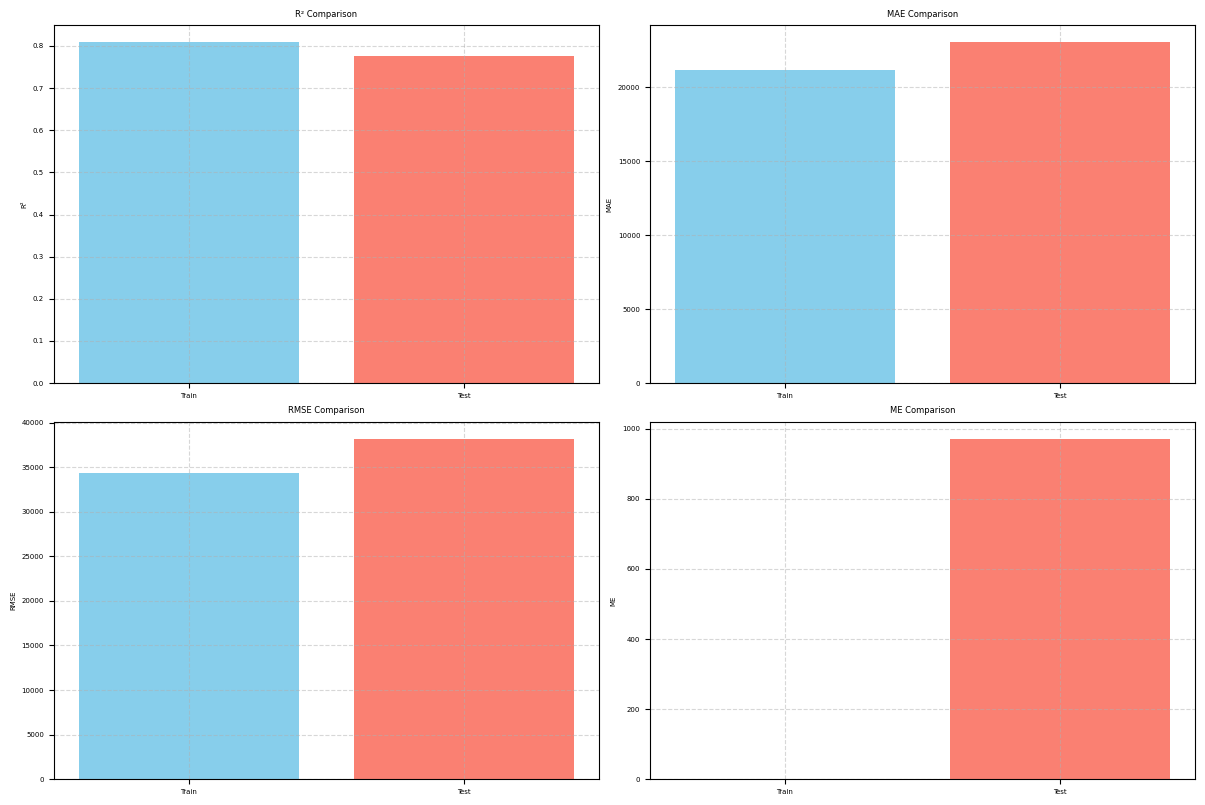

In [ ]:
metric_names = ['R²', 'MAE', 'RMSE', 'ME']
train_scores = [r2_train_NE, mae_train_NE, rmse_train_NE, me_train_NE]
test_scores = [r2_test_NE, mae_test_NE, rmse_test_NE, me_test_NE]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(len(metric_names)):
    axes[i].bar(['Train', 'Test'], [train_scores[i], test_scores[i]], color=['skyblue', 'salmon'])
    axes[i].set_title(f'{metric_names[i]} Comparison')
    axes[i].set_ylabel(metric_names[i])
    axes[i].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

* We see from the graphs and the train above that
the performance is better in training than in validation (test).

* It can be seen that the RMSE is significantly larger than the MAE because the outliers in the model that significantly increase the MSE/RMSE.

# **4.Experiments and hyperparameter selection**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

alphas = [0 ,0.0001, 0.001, 0.01, 0.1, 1]
train_errors = []
test_errors = []

best_alpha = None
best_rmse = float('inf')  # start with a high value.
results = []

for alpha in alphas:
    model = SGDRegressor(alpha=alpha, max_iter=1000, random_state=42)
    model.fit(X_train, t_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = metrics.mean_squared_error(t_train, y_train_pred)
    rmse_test = metrics.mean_squared_error(t_test, y_test_pred)

    train_errors.append(rmse_train)
    test_errors.append(rmse_test)
    results.append((alpha, rmse_test))  # Result only by test

    if rmse_test < best_rmse:
        best_rmse = rmse_test
        best_alpha = alpha

# Optimal alpha printing
print(f"Best alpha: {best_alpha}, RMSE on test: {best_rmse:.2f}")

Best alpha: 0.0001, RMSE on test: 5864795875050565065981376331776.00


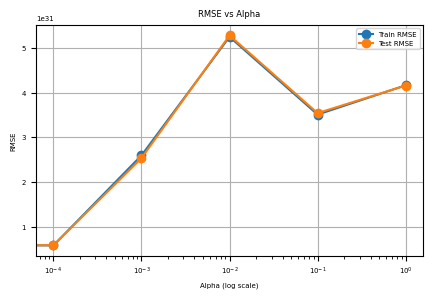

In [ ]:
# Plotting RMSE by alpha
plt.plot(alphas, train_errors, label='Train RMSE', marker='o')
plt.plot(alphas, test_errors, label='Test RMSE', marker='o')
plt.xscale('log')  # Important Because the values ​​progress logarithmically
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("RMSE vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

Tested different alpha values to see their effect on RMSE.



# Linear Regression Using SGD
Placing the alpha we found in SGD model

In [ ]:
sgd_model = linear_model.SGDRegressor(alpha=best_alpha, learning_rate='constant')
SGD_reg = sgd_model.fit(X_train, t_train)
y_train_SGD = SGD_reg.predict(X_train)
y_test_SGD = SGD_reg.predict(X_test)

In [ ]:
# Performance metrics
r2_train_SGD_no_norm = SGD_reg.score(X_train, t_train)
r2_test_SGD_no_norm = SGD_reg.score(X_test, t_test)
mae_train_SGD_no_norm = metrics.mean_absolute_error(t_train, y_train_SGD)
mae_test_SGD_no_norm = metrics.mean_absolute_error(t_test, y_test_SGD)
rmse_train_SGD_no_norm = metrics.root_mean_squared_error(t_train, y_train_SGD)
rmse_test_SGD_no_norm = metrics.root_mean_squared_error(t_test, y_test_SGD)
me_train_SGD_no_norm = calculate_mean_error(t_train, y_train_SGD)
me_test_SGD_no_norm = calculate_mean_error(t_test, y_test_SGD)
print('R2 on train',r2_train_SGD_no_norm)
print('R2 on test', r2_test_SGD_no_norm)
print()
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
print('MAE on train',mae_train_SGD_no_norm)
print('MAE on test', mae_test_SGD_no_norm)
print()
print('RMSE on train',rmse_train_SGD_no_norm)
print('RMSE on test', rmse_test_SGD_no_norm)
print()
print('ME on train',me_train_SGD_no_norm)
print('ME on test', me_test_SGD_no_norm)

R2 on train -4.605476288301461e+23
R2 on test -4.631545735519671e+23

MSE on train 1175469082.209731
MSE on test 1458765898.405628

MAE on train 4.998017088427893e+16
MAE on test 5.147843834823335e+16

RMSE on train 5.3181624432994584e+16
RMSE on test 5.490401904870086e+16

ME on train -4.97856738739245e+16
ME on test -5.133046232405891e+16


# Features Standardization
We will use StandardScaler to standardize the features. This involves subtracting the mean (μ) of each feature and
dividing by its standard deviation (σ). This process transforms the data so that it approximates a standard normal distribution: N ∼ (0, 1).
standard score =
(X− μ) / σ

In [ ]:
# standardize the features and run SGD on the data
SGD_reg = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDRegressor(alpha=best_alpha, learning_rate='constant')).fit(X_train, t_train)
y_train_SGD = SGD_reg.predict(X_train)
y_test_SGD = SGD_reg.predict(X_test)

In [ ]:
# Performance metrics
r2_train_SGD = SGD_reg.score(X_train, t_train)
r2_test_SGD = SGD_reg.score(X_test, t_test)
mae_train_SGD = metrics.mean_absolute_error(t_train, y_train_SGD)
mae_test_SGD = metrics.mean_absolute_error(t_test, y_test_SGD)
rmse_train_SGD = metrics.root_mean_squared_error(t_train, y_train_SGD)
rmse_test_SGD = metrics.root_mean_squared_error(t_test, y_test_SGD)
me_train_SGD = calculate_mean_error(t_train, y_train_SGD)
me_test_SGD = calculate_mean_error(t_test, y_test_SGD)
print('R2 on train',r2_train_SGD)
print('R2 on test', r2_test_SGD)
print()
print('MSE on train', metrics.mean_squared_error(t_train, y_train))
print('MSE on test', metrics.mean_squared_error(t_test, y_test))
print()
print('MAE on train',mae_train_SGD)
print('MAE on test', mae_test_SGD)
print()
print('RMSE on train',rmse_train_SGD)
print('RMSE on test', rmse_test_SGD)
print()
print('ME on train',me_train_SGD)
print('ME on test', me_test_SGD)

R2 on train 0.7847538318588886
R2 on test 0.7402402696214455

MSE on train 1175469082.209731
MSE on test 1458765898.405628

MAE on train 22798.188523059303
MAE on test 25395.455280375452

RMSE on train 36357.33466143939
RMSE on test 41117.53497319229

ME on train -286.1869372152118
ME on test 925.4624530658691


In [ ]:
# Fill result to the model
comparison_data = {
    'Model': ['NE', 'SGD (no norm)', 'SGD (with norm)'],

    'R² Train': [r2_train_NE, r2_train_SGD_no_norm, r2_train_SGD],
    'R² Test':  [r2_test_NE,  r2_test_SGD_no_norm,  r2_test_SGD],

    'MAE Train': [mae_train_NE, mae_train_SGD_no_norm, mae_train_SGD],
    'MAE Test':  [mae_test_NE,  mae_test_SGD_no_norm,  mae_test_SGD],

    'RMSE Train': [rmse_train_NE, rmse_train_SGD_no_norm, rmse_train_SGD],
    'RMSE Test':  [rmse_test_NE,  rmse_test_SGD_no_norm,  rmse_test_SGD],

    'ME Train': [me_train_NE, me_train_SGD_no_norm, me_train_SGD],
    'ME Test':  [me_test_NE,  me_test_SGD_no_norm,  me_test_SGD]
}

# Creates table
comparison_df = pd.DataFrame(comparison_data)


print(comparison_df)

             Model      R² Train       R² Test     MAE Train      MAE Test  \
0               NE  8.085909e-01  7.758683e-01  2.115989e+04  2.303649e+04   
1    SGD (no norm) -4.605476e+23 -4.631546e+23  4.998017e+16  5.147844e+16   
2  SGD (with norm)  7.847538e-01  7.402403e-01  2.279819e+04  2.539546e+04   

     RMSE Train     RMSE Test      ME Train       ME Test  
0  3.428511e+04  3.819379e+04 -2.165792e-10  9.714406e+02  
1  5.318162e+16  5.490402e+16 -4.978567e+16 -5.133046e+16  
2  3.635733e+04  4.111753e+04 -2.861869e+02  9.254625e+02  


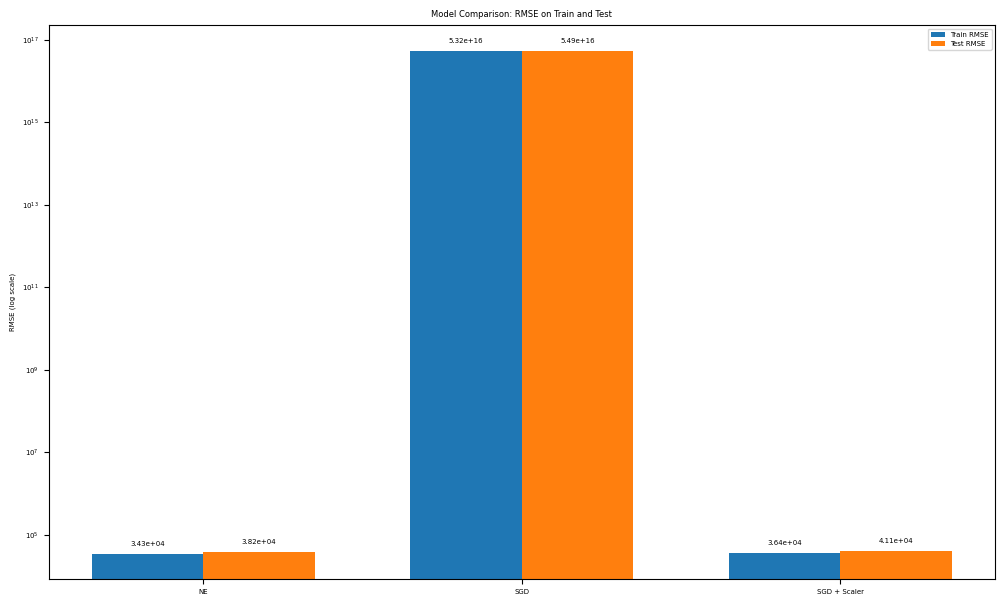

In [ ]:
models = ['NE', 'SGD', 'SGD + Scaler'] # The names of the models

# RMSE values
rmse_train = [rmse_train_NE,  rmse_train_SGD_no_norm,  rmse_train_SGD]
rmse_test = [rmse_test_NE,  rmse_test_SGD_no_norm,  rmse_test_SGD]

x = np.arange(len(models))  # Column positions
width = 0.35  # Width of each column

# Comparison graph
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rmse_train, width, label='Train RMSE')
bars2 = ax.bar(x + width/2, rmse_test, width, label='Test RMSE')

# Titles
ax.set_ylabel('RMSE (log scale)')
ax.set_title('Model Comparison: RMSE on Train and Test')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_yscale('log')
ax.legend()

# Adding values ​​above the columns
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2e}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # Spacing above
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

The charts compare the performance of three linear models (NE, SGD, and SGD with scaling) across multiple evaluation metrics.  
NE and SGD+Scaler show similar and stable results, while SGD without scaling performs poorly, especially on RMSE (orders of magnitude higher).  
This highlights the critical importance of feature standardization when using SGD.  
In addition, NE achieves the best overall accuracy with minimal prediction bias (ME ≈ 0).

# Train On The Test File

In [ ]:
# 1. Load Kaggle test set
submission_df = pd.read_csv("/content/drive/MyDrive/test.csv")
submission_df = submission_df.select_dtypes(exclude=['object'])  # Removes all object-type columns

In [ ]:
# 2. Align Kaggle test set columns with training set
cols_to_drop = list(set(submission_df.columns) - set(X_train.columns))
X_submission = submission_df.drop(columns=cols_to_drop, errors='ignore')
X_submission = X_submission.reindex(columns=X_train.columns)  # Ensure same order

In [ ]:
# Handle missing values
for column in X_submission.columns:
    median_val = X_train[column].median()
    X_submission[column] = X_submission[column].fillna(median_val)

In [ ]:
# 3. Predict on the test set
submission_predictions = SGD_reg.predict(X_submission)

In [ ]:
# 4. Build submission DataFrame
submission = pd.DataFrame({
    "Id":        submission_df["Id"],
    "SalePrice": submission_predictions
})

In [ ]:
# 5. Save as CSV for Kaggle upload
submission.to_csv("submission.csv", index=False)
print("csv saved")

csv saved


# **7. Submission photos and leaderboard position**

- Best submission score on Kaggle: [0.23626]
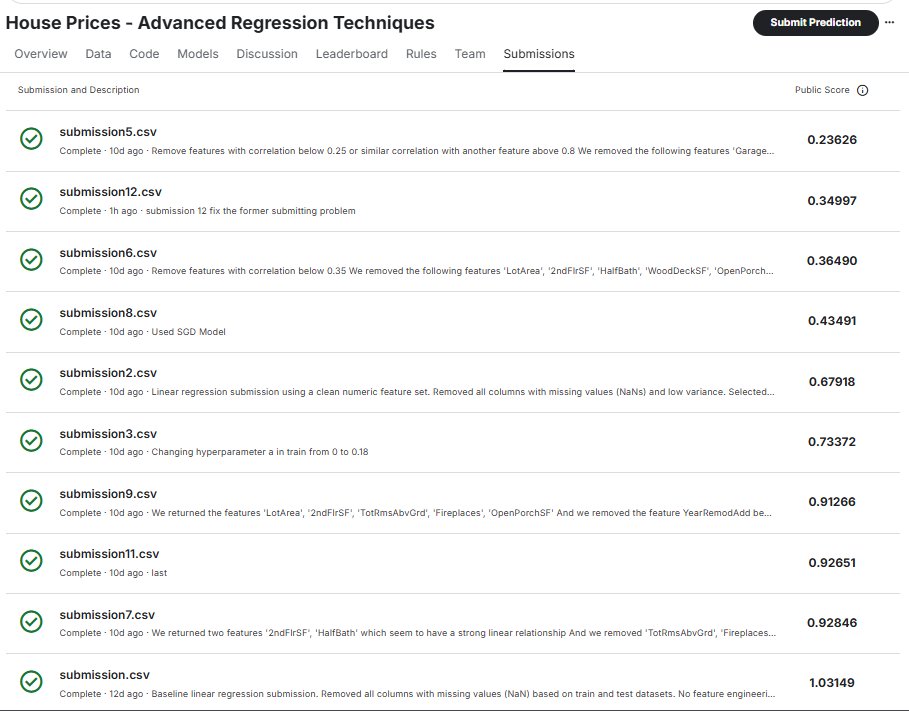

### LeaderBoard Place is **4062**


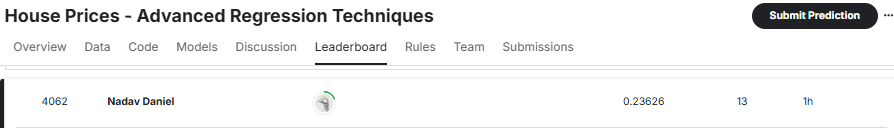

# **Work summary**

In this project, we trained a basic linear regression model to predict house prices using the Kaggle housing dataset.

What worked well:

* Removing features with 0 values in the 25th, 50th, and 75th percentiles improved performance.

* Eliminating features that were strongly correlated (> 0.8) with other non-target features reduced redundancy.

* Dropping features with a low correlation (< 0.25) to SalePrice significantly boosts the score.

* Removing low-variance features (near-constant values) contributed to better generalization.

What didn’t work:

* Removing features with high standard deviation relative to the median hurt performance.

* Dropping features with high correlation to SalePrice — even if they seem helpful — often decrease results.

* Running SGD model without normalization cause us bad results

In conclusion, We explored the data and trained regression models to predict house prices, using feature selection to improve performance.






# **8. References**
* Practice Notebook 2 from the course (Regression Exercise)

* Conversations with ChatGPT for data analysis, model tuning, and implementation support

* Kaggle Competition: House Prices – Advanced Regression Techniques